In [1]:
import pandas as pd
import os

In [2]:
topic = 'feminism'
scheme = 'EII'

path = os.getcwd()
clean_path = f'{path}/clean'
NN_path = f'{path}/NN/{topic}/{scheme}'

train_file = f'{path}/train/labeled_{topic}_train.csv'
test_file = f'{path}/test/labeled_{topic}_test.csv'

os.makedirs(NN_path, exist_ok=True)
os.makedirs(f'{clean_path}/train', exist_ok=True)
os.makedirs(f'{clean_path}/test', exist_ok=True)

NN_path

'/media/rinnely/Archer/ENES/Stance/Clasificador/NN/feminism/EII'

In [3]:
train = pd.read_csv(train_file)

In [4]:
train.head()

,id,Tweet,Label_EI,Stance_EI,Label_EII,Stance_EII,Label_EIII,Stance_EIII,Label_EIII_v2,Stance_EIII_v2,Date
0,1343345719374188544,even though this person is basically using fem...,0,Uknown,0,Uknown,0,Uknown,0,Uknown,2020-12-27 17:59:12
1,1343345503434649600,"This... Opinion | During the Coronavirus, Femi...",0,Uknown,0,Uknown,0,Uknown,0,Uknown,2020-12-27 17:58:20
2,1343345499278086144,So I am a mixed Black person and that has evol...,0,Uknown,0,Uknown,0,Uknown,0,Uknown,2020-12-27 17:58:19
3,1343345498862858240,"Bidisha, in Chapter 6 of The Fifty Shades of F...",0,Uknown,0,Uknown,0,Uknown,0,Uknown,2020-12-27 17:58:19
4,1343345262228631554,@hamelitee because of feminism. ;-) balls are ...,0,Uknown,1,Favor,0,Uknown,0,Uknown,2020-12-27 17:57:23


In [5]:
train = train[[f'Label_{scheme}', 'Tweet']]
train.columns = ['Label', 'Tweet']

In [6]:
train.head()

,Label,Tweet
0,0,even though this person is basically using fem...
1,0,"This... Opinion | During the Coronavirus, Femi..."
2,0,So I am a mixed Black person and that has evol...
3,0,"Bidisha, in Chapter 6 of The Fifty Shades of F..."
4,1,@hamelitee because of feminism. ;-) balls are ...


In [7]:
train.Label.unique()

array([ 0,  1, -1])

In [8]:
train = train.query('Label != 0')
train.Label.unique()

array([ 1, -1])

In [9]:
train.groupby('Label').count()

,Tweet
Label,
-1,1191
1,2116


In [10]:
test = pd.read_csv(test_file)
test.head()

,Tweet,Stance,Target
0,Feminists can TOTALLY wear makeup and don't te...,AGAINST,Feminist Movement
1,"I searched for posts with ""feminist"" tag and s...",AGAINST,Feminist Movement
2,I saw a little girl wearing a mustache from th...,AGAINST,Feminist Movement
3,Women are taught to put their values into thei...,AGAINST,Feminist Movement
4,If u link anti feminism with misogyny or inequ...,AGAINST,Feminist Movement


In [11]:
test = test[['Stance', 'Tweet']]
test.Stance.unique()

array(['AGAINST', 'FAVOR'], dtype=object)

In [12]:
test['Stance']= test.Stance.replace({'FAVOR':1, 'AGAINST':-1, 'C':0})
test = test.query('Stance != 0')
test.Stance.unique()

array([-1,  1])

In [13]:
test.columns = ['Label', 'Tweet']
test.groupby('Label').count()

,Tweet
Label,
-1,511
1,267


In [14]:
train.shape, test.shape

((3307, 2), (778, 2))

# clean data

In [15]:
import sys
sys.path.insert(0, '/home/rinnely/ENES/Stance')
import cleandata as cd

In [16]:
train = cd.cleanData(train.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')
test = cd.cleanData(test.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')

In [17]:
train = train.dropna(axis=0)

# save data

In [18]:
train.to_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv', index=False)
test.to_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv', index=False)

# read data

In [19]:
train = pd.read_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv')
test = pd.read_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv')

<AxesSubplot:ylabel='Label'>

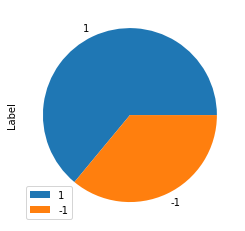

In [20]:
train['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:ylabel='Label'>

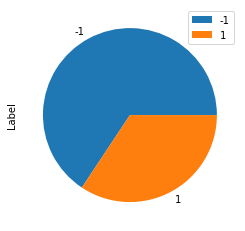

In [21]:
test['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:>

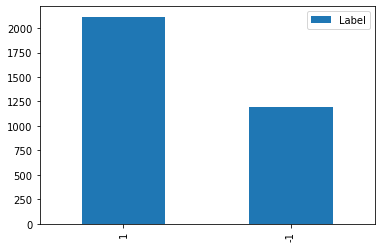

In [22]:
train['Label'].value_counts().plot.bar(legend=True)

<AxesSubplot:>

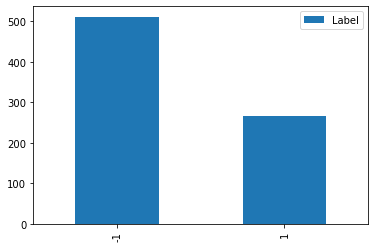

In [23]:
test['Label'].value_counts().plot.bar(legend=True)

In [24]:
train

,Label,Tweet
0,1,USER because of feminism. ;-) balls are a miso...
1,1,Dumped a blockbuster to watch #Misbehaviour to...
2,1,It's time to be honest about the burden we're ...
3,1,don’t cancel me af but thinking it’s ok to dow...
4,1,Boy Scouts of America accuse Girl Scouts of st...
...,...,...
3302,1,#COVID__19 #QuarantineLife #CoronavirusIndia #...
3303,1,This tweet and its replies could change the world
3304,1,What is the problem with political philosophy ...
3305,1,May the peace that comes with this season neve...


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   3307 non-null   int64 
 1   Tweet   3307 non-null   object
dtypes: int64(1), object(1)
memory usage: 51.8+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   778 non-null    int64 
 1   Tweet   778 non-null    object
dtypes: int64(1), object(1)
memory usage: 12.3+ KB


In [27]:
train = train.dropna(axis=0)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3307 entries, 0 to 3306
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   3307 non-null   int64 
 1   Tweet   3307 non-null   object
dtypes: int64(1), object(1)
memory usage: 77.5+ KB


# Training

In [29]:
from fastai.text import *

In [30]:
data_lm = (TextList.from_df(train, NN_path, cols='Tweet')
          .split_by_rand_pct(0.1)
          .label_for_lm() # this does the tokenization and numericalization
          .databunch())

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [31]:
data_lm.show_batch()

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,"’s great . xxmaj the only question it left us with was “ xxmaj how far we still have to go ! ” xxup url xxbos xxmaj it 's time to be honest about the burden we 're putting on women , particularly those without the resources to xxunk at the problem . xxmaj for 2021 and beyond , i 'm xxunk my feminism as solidarity , not success ."
1,"xxbos xxwrep 9 xxup user xxmaj it 's feminism man . xxmaj what you think it should or should n't be , is xxunk . xxmaj you 're not a feminist . xxmaj you do nt decide , you do n't get a vote . xxmaj you are xxunk . i am offended and ashamed by your ignorance , xxunk and xxunk . xxmaj you xxunk all of us men"
2,bad xxmaj bitch feminism ” were your both xxunk feminist and xxunk xxmaj love patriarchy . xxmaj also it xxunk co - xxunk the language of xxmaj sex xxunk . xxbos xxmaj if i 'm being honest here . i think feminism has created more misgony and sexism than anything men could do . xxup xxunk but women can be as xxunk as men can be . xxmaj xxunk is
3,"xxup user xxmaj the point is that this is not a gender based issue . xxmaj so trying to come in here like you are now , and using feminism as a way to xxunk this man ’s experiences just is nt something you should be doing rn xxbos feminism is xxunk equality is worth it xxbos xxwrep 9 xxup user i do n’t know what a ‘ cis woman"
4,"xxbos xxmaj feminism xxmaj is xxmaj cancer xxup url xxbos xxmaj this woman is the definition of the utter corruption and xxunk caused by # xxmaj feminism . xxup url xxbos xxmaj my rights do n’t care about how offended you feel in their presence , neither do they xxunk to exist to xxunk your opinion . . xxbos xxmaj that # toxicmasculinity .. xxup url xxbos i used to"


In [32]:
data_clas = TextClasDataBunch.from_df(NN_path, train_df=train, 
                                      valid_df=test, 
                                      vocab=data_lm.vocab, 
                                      text_cols = 'Tweet', 
                                      label_cols = 'Label',
                                      bs=32)

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [33]:
data_clas.show_batch()

text,target
"xxbos xxup imagine xxup getting xxup xxunk ( for the xxmaj date ) xxup and xxup paying xxunk $ xxup to xxup an "" # xxmaj xxunk "" xxup and xxup pay xxup for xxup xxunk xxup and xxup she xxup xxunk xxup put xxup out xxup on xxup top xxup of xxup that xxup she xxup xxunk xxup you xxup up xxup on xxup twitter xxmaj never # xxmaj",-1
"xxbos xxup user xxup user xxmaj civility is freely given , xxunk you ca n't be civil back xxmaj but xxmaj respect is earned . xxmaj earned . xxmaj feminism lied to you . # feminismiscancer xxmaj lots of xxunk & & beautiful people out there . xxmaj read : xxmaj men xxmaj on xxmaj strike , xxmaj dr. xxmaj helen xxmaj smith ( xxunk simple read ) and then",-1
"xxbos xxup user xxup user xxmaj everything about xxmaj feminism is xxmaj fake xxmaj you have to go all the way back to xxunk - xxmaj feminism , an era called * * xxmaj women 's xxmaj liberation xxmaj movement * * to find xxup anything honorable xxmaj fact : # feminismiscancer & & is responsible for the destruction of our xxmaj society : xxmaj destroying xxmaj democracy using xxmaj",-1
xxbos xxup user xxmaj yes ! xxmaj and it must end . xxmaj please help us fight # feminism instead of fighting women . # xxunk # feminismiscancer xxmaj division is man - made ( xxmaj xxunk - made ) . xxmaj this is xxmaj good vs xxmaj evil . xxmaj love that you 're changing the toxic narrative but does it have to destroy your daughters ?,-1
"xxbos xxup user xxup user xxmaj respect is * earned * xxmaj is being a xxup hateful monster , xxunk xxmaj lies , xxmaj half - truths , & & xxunk xxmaj xxunk a path to xxmaj respect ? xxup xxunk xxmaj feminism 's brand of xxmaj marxist 's xxmaj leftism has a particularly xxunk mental illness xxunk into it .",-1


In [34]:
f'data_clas_{topic}_{scheme}'

'data_clas_feminism_EII'

In [35]:
data_lm.save(f'data_lm_{topic}_{scheme}')
data_clas.save(f'data_clas_{topic}_{scheme}')

In [ ]:
data_lm.train_ds.vocab.itos[:10], len(data_lm.train_ds.vocab.itos)

In [ ]:
#f'{pathNN}/spanish-model/lm-spanish-weights-2'

In [ ]:
#pretrained_model = (f'{pathNN}/spanish-model/lm-spanish-weights-2', f'{pathNN}/spanish-model/spanish-itos-pickle')

In [36]:
#learn = ftxt.language_model_learner(data_lm, arch=ftxt.AWD_LSTM, drop_mult=.2)
learn_lm = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02
Min loss divided by 10: 4.37E-02


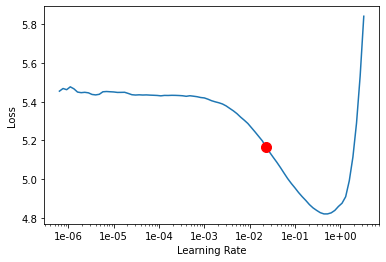

In [37]:
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [38]:
learn_lm.fit_one_cycle(10, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.070757,4.238294,0.234970,00:06
1,4.471352,3.589977,0.302827,00:06
2,4.051463,3.427721,0.325074,00:06
3,3.734939,3.387105,0.329315,00:06
4,3.492997,3.390187,0.327232,00:06
5,3.285684,3.385810,0.332589,00:06
6,3.113961,3.387757,0.335045,00:06
7,2.982465,3.385869,0.338318,00:06
8,2.882955,3.389851,0.337723,00:06
9,2.805498,3.390231,0.337946,00:06


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-03
Min loss divided by 10: 4.37E-04


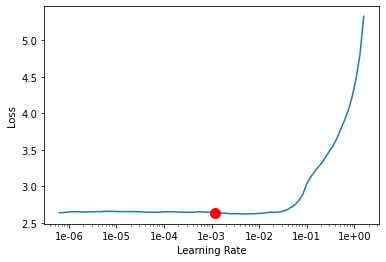

In [39]:
learn_lm.unfreeze()
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [40]:
learn_lm.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.673318,3.393820,0.338616,00:08
1,2.622074,3.387759,0.343899,00:08
2,2.547158,3.389672,0.345015,00:08
3,2.480525,3.410947,0.346949,00:08
4,2.432212,3.408498,0.346726,00:08


In [41]:
learn_lm.save_encoder(f'{topic}_ml_encoder_v1')

In [42]:
learn_lm.load_encoder(f'{topic}_ml_encoder_v1');

In [43]:
learn_lm.save(f'{topic}_model_v1')

In [44]:
learn_lm.load(f'{topic}_model_v1');

In [45]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [46]:
from sklearn.metrics import f1_score

@np_func #converts torch tesnsor as numpy array
def f1_macro(inp, targ): return f1_score(targ, np.argmax(inp, axis=1), average='macro')

In [47]:
learn.load_encoder(f'{topic}_ml_encoder_v1')
learn.metrics=[f1_macro]
learn.freeze()

In [48]:
learn.save('learner-1stage')

In [49]:
learn.load('learner-1stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-03
Min loss divided by 10: 1.20E-02


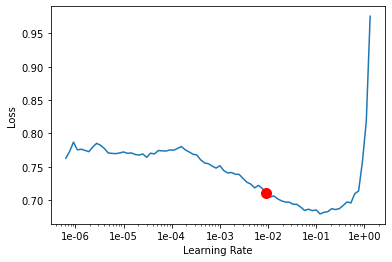

In [50]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [51]:
learn.fit_one_cycle(10,1e-2,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.572532,0.667222,0.563287,00:06
1,0.519540,0.673151,0.566758,00:06
2,0.514077,0.717441,0.507000,00:06
3,0.503614,0.770784,0.468896,00:06
4,0.474055,0.679982,0.582699,00:05
5,0.447091,0.685161,0.568132,00:06
6,0.467400,0.692289,0.547765,00:06
7,0.447888,0.717384,0.538501,00:06
8,0.457022,0.695158,0.570224,00:06
9,0.432427,0.714584,0.557698,00:06


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [52]:
learn.save('learner-2stage')

In [53]:
learn.load('learner-2stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.58E-07


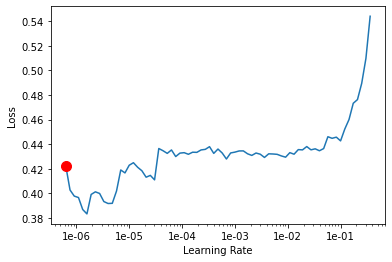

In [54]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [55]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.439040,0.715662,0.545618,00:06
1,0.439279,0.673551,0.575541,00:06
2,0.436802,0.676222,0.591528,00:06
3,0.432909,0.778364,0.529262,00:06
4,0.424686,0.756523,0.558575,00:06


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [56]:
learn.save('learner-3stage')

In [57]:
learn.load('learner-3stage');

In [ ]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.32E-07


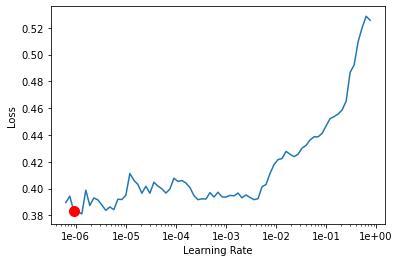

In [58]:
learn.freeze_to(-2)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5,moms=(0.8, 0.7));

In [ ]:
learn.save('learner-stage-freeze-2')

In [ ]:
learn.save('learner-stage-freeze-2')

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 6.92E-07


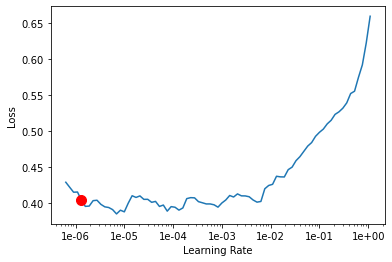

In [59]:
learn.freeze_to(-3)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [60]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.416434,0.731344,0.576634,00:11
1,0.419090,0.711712,0.592044,00:11
2,0.366188,0.735058,0.595465,00:11
3,0.352851,0.756018,0.586341,00:11
4,0.312603,0.762572,0.581485,00:12


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [61]:
learn.save('learner-stage-freeze-3')

In [62]:
learn.load('learner-stage-freeze-3');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


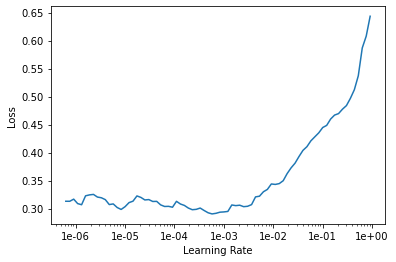

In [63]:
learn.unfreeze()
learn.lr_find(); learn.recorder.plot()

In [64]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.299737,0.753030,0.610070,00:16
1,0.294559,0.825903,0.573439,00:14
2,0.239837,0.810251,0.585114,00:16
3,0.206931,1.002583,0.575018,00:15
4,0.165605,1.045579,0.570714,00:15


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [65]:
learn.save('learner-stage-unfreeze-61')

In [66]:
learn.load('learner-stage-unfreeze-61');

In [67]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = TextClassificationInterpretation(learn, preds, y, losses)

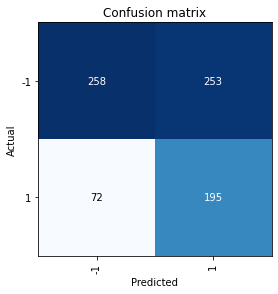

In [68]:
interp.plot_confusion_matrix()

In [69]:
preds

tensor([[0.9190, 0.0810],
        [0.8014, 0.1986],
        [0.0043, 0.9957],
        ...,
        [0.5890, 0.4110],
        [0.0015, 0.9985],
        [0.0182, 0.9818]])

In [70]:
learn.save('learner-final')